## Natural Language Processing

Natural Language Processing, or NLP for short, is broadly defined as the automatic manipulation of natural language, like speech and text, by software.  NLP application
concerned with predicting the text given in the preceding text. Auto-complete
or suggested responses are popular types of language prediction

## Preprocessing the Dataset

The first step is to remove the unnecessary data 



In [113]:
#Importing the necessary libraries
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Other imports for processing data
import string
import numpy as np
import pandas as pd

In [114]:
#reading the file and saving the data to list and converting the list to pandas Series

file=open('/content/drive/My Drive/Colab Notebooks/Datasets/nlp.txt','r',encoding='utf8')
lines=[]
for i in file:
  lines.append(i)

#converting to Pandas Series
data_file=pd.Series(lines)

In [115]:
data_file

0                                 No ,  he says now .\n
1                                And what did he do ?\n
2                                The money 's there .\n
3                     That was less than a year ago .\n
4                        But he made only the first .\n
                              ...                      
56009    She said she 's not going out of the house .\n
56010                            It 's used by both .\n
56011                          If it has nt , do nt .\n
56012                               Now we have two .\n
56013                 There 's no way it could have bee
Length: 56014, dtype: object

In [116]:

#Function for creating the tokenization of the input data
def tokenizer_corpus(corpus,num_words=-1):
  #Tokenizing
  if num_words >-1:
    tokenizer=Tokenizer(num_words=num_words)
  else:
    tokenizer=Tokenizer()
  tokenizer.fit_on_texts(corpus)
  
  return tokenizer

#Preprocessing of the input data and creating a corpus of the dataset
def data_corpus(dataset):
  #Removing Punctuatuin
  dataset=dataset.str.replace('[{}]'.format(string.punctuation),'')
  #converting to lowercase
  dataset=dataset.str.lower()
  #making one long sequence
  dataset=dataset.str.cat()
  corpus=dataset.split('\n')
  #Removing white spaces
  for l in range(len(corpus)):
    corpus[l]=corpus[l].rstrip()
  #Remove empty lines
  corpus=[l for l in corpus if l!='']

  return corpus


In [118]:
#Reading the dataset of first 1000 because even if we use the complete dataset the total unique words in the dataset is around 240.
dataset=data_file[:1000]
#creating the corpus
corpus=data_corpus(dataset)
#Tokenizing the corpus
tokenizer=tokenizer_corpus(corpus)

total_words=len(tokenizer.word_index)+1
print('Tokenization of the input data:\n',tokenizer.word_index)
print('\nTotal unique words in dataset of first 1000 :\n',total_words)

Tokenization of the input data:
 {'it': 1, 'to': 2, 'i': 3, 'do': 4, 'nt': 5, 'that': 6, 'he': 7, 'you': 8, 's': 9, 'the': 10, 'we': 11, 'is': 12, 'what': 13, 'said': 14, 'was': 15, 'not': 16, 'but': 17, 'know': 18, 'have': 19, 'they': 20, 'a': 21, 'this': 22, 'and': 23, 'did': 24, 'there': 25, 'be': 26, 'are': 27, 'want': 28, 'of': 29, 'time': 30, 'all': 31, 'for': 32, 'get': 33, 'in': 34, 'going': 35, 'she': 36, 'can': 37, 'go': 38, 'just': 39, 'no': 40, 'one': 41, 'would': 42, 'how': 43, 'come': 44, 'could': 45, 'like': 46, 'way': 47, 'think': 48, 'now': 49, 'will': 50, 'out': 51, 'so': 52, 'right': 53, 'people': 54, 'about': 55, 'here': 56, 'work': 57, 'them': 58, 'good': 59, 'money': 60, 'my': 61, 'does': 62, 'me': 63, 'if': 64, 'more': 65, 'had': 66, 'say': 67, 'where': 68, 'us': 69, 'life': 70, 'on': 71, 'well': 72, 'has': 73, 'much': 74, 'play': 75, 'long': 76, 'year': 77, 'been': 78, 'back': 79, 'see': 80, 'when': 81, 'never': 82, 'only': 83, 'at': 84, 'game': 85, 'as': 86, 't

In [119]:
data_file.shape

(56014,)

In [120]:
corpus[1]

'and what did he do'

In [121]:
sequences= []

for line in corpus:
  token_list=tokenizer.texts_to_sequences([line])[0]
  #print(token_list)
  for i in range(1,len(token_list)):
    n_gram_sequence=token_list[:i+1]
    #print(n_gram_sequence)
    sequences.append(n_gram_sequence)
#print('sequence:',sequences)

#Pad Sequences for equal input length
max_sequence_len=max([len(seq) for seq in sequences])
sequences=np.array(pad_sequences(sequences,maxlen=max_sequence_len,padding='pre'))
#print(sequences)

#split seq between input seq and output predicted word
input_sequences,labels=sequences[:,:-1],sequences[:,-1]
print('Input:\n',input_sequences)
print('\nnext word\n:',labels)

#one hot encoding
one_hot_labels=tf.keras.utils.to_categorical(labels,num_classes=total_words) 
print('\none hot labels:\n',one_hot_labels)

Input:
 [[  0   0   0 ...   0   0  40]
 [  0   0   0 ...   0  40   7]
 [  0   0   0 ...  40   7 161]
 ...
 [  0   0   0 ...   2  48  71]
 [  0   0   0 ...   0   0  17]
 [  0   0   0 ...   0  17  36]]

next word
: [  7 161  49 ...   1  36  14]

one hot labels:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [122]:
#Tokenizer has just single index per word
print(tokenizer.word_index['know'])
print(tokenizer.word_index['me'])
#input sequnces with multiple index
print(input_sequences[5])
print(input_sequences[6])
#One Hot label
print(one_hot_labels[5])
print(one_hot_labels[6])

18
63
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 23 13 24]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 23 13 24  7]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0

In [123]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Bidirectional,LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam



In [124]:
#creating the model
model=Sequential()
model.add(Embedding(total_words,64,input_length=max_sequence_len-1))
model.add(LSTM(200,return_sequences=True))
model.add(LSTM(200,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(total_words,activation='softmax'))

# code to find the best learning rate
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * 10**(epoch / 30))

optimizer = keras.optimizers.Adam(lr=1e-3)

In [125]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model_train=model.fit(input_sequences,one_hot_labels,epochs=100,verbose=1,callbacks=[lr_schedule])

Epoch 1/100
177/177 [==============================] - 2s 10ms/step - loss: 4.8307 - accuracy: 0.0362
Epoch 2/100
177/177 [==============================] - 2s 10ms/step - loss: 4.7362 - accuracy: 0.0367
Epoch 3/100
177/177 [==============================] - 2s 10ms/step - loss: 4.7012 - accuracy: 0.0494
Epoch 4/100
177/177 [==============================] - 2s 10ms/step - loss: 4.3350 - accuracy: 0.1031
Epoch 5/100
177/177 [==============================] - 2s 10ms/step - loss: 3.9811 - accuracy: 0.1496
Epoch 6/100
177/177 [==============================] - 2s 11ms/step - loss: 3.8060 - accuracy: 0.1722
Epoch 7/100
177/177 [==============================] - 2s 10ms/step - loss: 3.6875 - accuracy: 0.1780
Epoch 8/100
177/177 [==============================] - 2s 10ms/step - loss: 3.5876 - accuracy: 0.1826
Epoch 9/100
177/177 [==============================] - 2s 10ms/step - loss: 3.4998 - accuracy: 0.1969
Epoch 10/100
177/177 [==============================] - 2s 10ms/step - loss: 3.442

(0.001, 10.0, 0.0, 15.0)

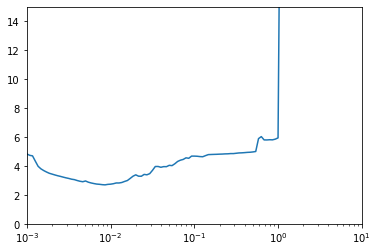

In [126]:
import matplotlib.pyplot as plt

plt.semilogx(model_train.history["lr"], model_train.history["loss"])
plt.axis([1e-3, 10, 0, 15])

Here we can see that the loss is increasing after 1e-2 hence we can choose the learning rate as 1e-2

In [127]:


model=Sequential()
model.add(Embedding(total_words,64,input_length=max_sequence_len-1))
model.add(LSTM(200,return_sequences=True))
model.add(LSTM(200,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(total_words,activation='relu'))
model.add(Dense(total_words,activation='softmax'))




optimizer = keras.optimizers.Adam(lr=1e-2)


In [128]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 22, 64)            14400     
_________________________________________________________________
lstm_30 (LSTM)               (None, 22, 200)           212000    
_________________________________________________________________
lstm_31 (LSTM)               (None, 22, 200)           320800    
_________________________________________________________________
lstm_32 (LSTM)               (None, 100)               120400    
_________________________________________________________________
dense_15 (Dense)             (None, 225)               22725     
_________________________________________________________________
dense_16 (Dense)             (None, 225)               50850     
Total params: 741,175
Trainable params: 741,175
Non-trainable params: 0
_______________________________________________

In [129]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model_train=model.fit(input_sequences,one_hot_labels,epochs=200,verbose=1)

Epoch 1/200
177/177 [==============================] - 2s 10ms/step - loss: 4.8226 - accuracy: 0.0336
Epoch 2/200
177/177 [==============================] - 2s 10ms/step - loss: 4.7379 - accuracy: 0.0378
Epoch 3/200
177/177 [==============================] - 2s 10ms/step - loss: 4.6593 - accuracy: 0.0410
Epoch 4/200
177/177 [==============================] - 2s 10ms/step - loss: 4.4286 - accuracy: 0.0726
Epoch 5/200
177/177 [==============================] - 2s 10ms/step - loss: 4.1345 - accuracy: 0.1026
Epoch 6/200
177/177 [==============================] - 2s 10ms/step - loss: 3.9572 - accuracy: 0.1289
Epoch 7/200
177/177 [==============================] - 2s 10ms/step - loss: 3.8369 - accuracy: 0.1483
Epoch 8/200
177/177 [==============================] - 2s 10ms/step - loss: 3.7340 - accuracy: 0.1584
Epoch 9/200
177/177 [==============================] - 2s 11ms/step - loss: 3.6345 - accuracy: 0.1670
Epoch 10/200
177/177 [==============================] - 2s 11ms/step - loss: 3.551

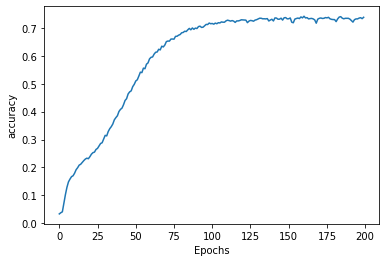

In [130]:
import matplotlib.pyplot as plt

def plot_graph(model_train,string):
  plt.plot(model_train.history[string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.show()

plot_graph(model_train,'accuracy')

We can see that the accuracy is constant after 100 epochs hence we can train the network between 100 and 120 epochs and get the same accuracy

### Predictions

In [131]:
text=['are you','can you','do you need','are you free']
next_words=5

for words in text:
  for _ in range(next_words):
    token_list=tokenizer.texts_to_sequences([words])[0]
    token_list=pad_sequences([token_list],maxlen=max_sequence_len-1,padding='pre')
    predicted=np.argmax(model.predict(token_list),axis=1)
    output_word=''
    for word,index in tokenizer.word_index.items():
      if index==predicted:
        output_word=word
        break
    words+=' ,'+output_word
  print(words)

are you ,going ,or ,not ,the ,way
can you ,say ,that ,s ,life ,in
do you need ,think ,it ,has ,nt ,be
are you free ,going ,or ,not ,the ,way
